Importing required modules/libraries of Python
Data Loading and Exploration

Load the Titanic dataset using pandas and display the first 5 rows. What are the column data types?
Link to data set :https://www.kaggle.com/datasets/yasserh/titanic-dataset

Note the Embarked means from where the people embarked on ship. S → if the passenger boarded at Southampton (England) , C → Cherbourg (France) , Q → Queenstown (Ireland)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Find datatypes of each feature of the given dataset


In [ ]:
# Check data types
dtypes = df.dtypes
print("\nData Types:\n", dtypes)


Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Basic Preprocessing of Dataset

In [ ]:

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

summary = df.describe()
print("\nSummary Statistics:\n", summary)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of Duplicate Rows: 0

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.00000

Applying Binning to the age column of provided data set.


Question :You need to apply equal-width binning on the age column of provided dataset. Divide the age into 5 bins and label them as Child, Teen, Adult, Middle-aged, and Senior.

In [ ]:
# Binning 'Age' column into categories
bins = [18, 25, 35, 50, 100]
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print("\nBinned Age Groups:\n", df[['Age', 'Age Group']])


Binned Age Groups:
       Age    Age Group
0    22.0        Young
1    38.0  Middle-Aged
2    26.0        Adult
3    35.0        Adult
4    35.0        Adult
..    ...          ...
886  27.0        Adult
887  19.0        Young
888   NaN          NaN
889  26.0        Adult
890  32.0        Adult

[891 rows x 2 columns]


Few visualization are provided in this snippet .Similarly from the provided dataset you need to visualize :

1:A histogram of the age column before and after binning.


2:A box plot of the fare column to identify outliers.

3:	A scatter plot of age vs. fare colored by survived.


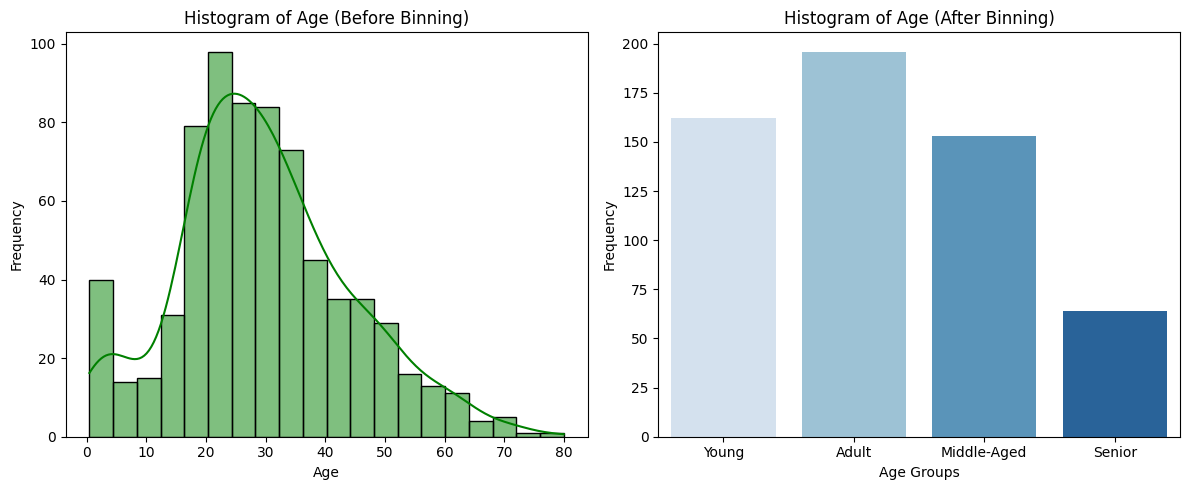

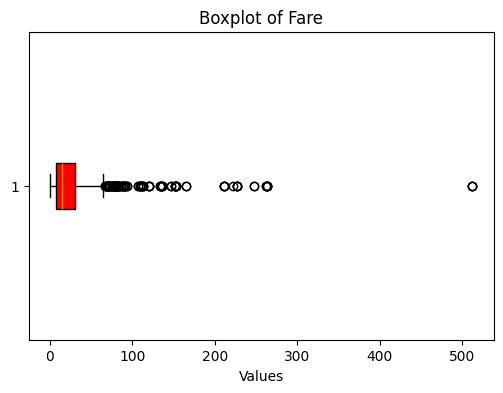

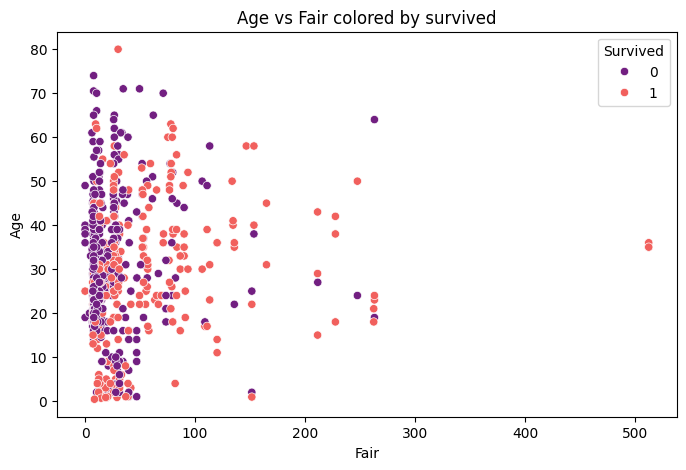

In [ ]:
# Visualization 1: Histogram of the age column before and after binning
bins = [18, 25, 35, 50, 100]
labels = ["Young", "Adult", "Middle-Aged", "Senior"]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
binned_counts = df['Age Group'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.histplot(df['Age'], kde=True, color='green', ax=axes[0])
axes[0].set_title("Histogram of Age (Before Binning)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

sns.barplot(x=binned_counts.index, y=binned_counts, hue=binned_counts.index, palette="Blues", ax=axes[1])
axes[1].set_title("Histogram of Age (After Binning)")
axes[1].set_xlabel("Age Groups")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Visualization 2: Box plot of the fare column to identify outliers
plt.figure(figsize=(6, 4))
plt.boxplot(df['Fare'], vert=False, patch_artist=True, boxprops=dict(facecolor="red"))
plt.title(f"Boxplot of Fare")
plt.xlabel("Values")
plt.show()


# Visualization 3: Scatter plot of Age vs Fair colored by survived
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Fare'], y=df['Age'], hue=df['Survived'], palette='magma')
plt.title("Age vs Fair colored by survived")
plt.xlabel("Fair")
plt.ylabel("Age")
plt.show()

Apply basic K-means using built in functions
You need to :
Apply K-Means clustering on the dataset using any numerical columns (age, fare, pclass). Use n_clusters=2 (survived vs. not survived) of provided data set.

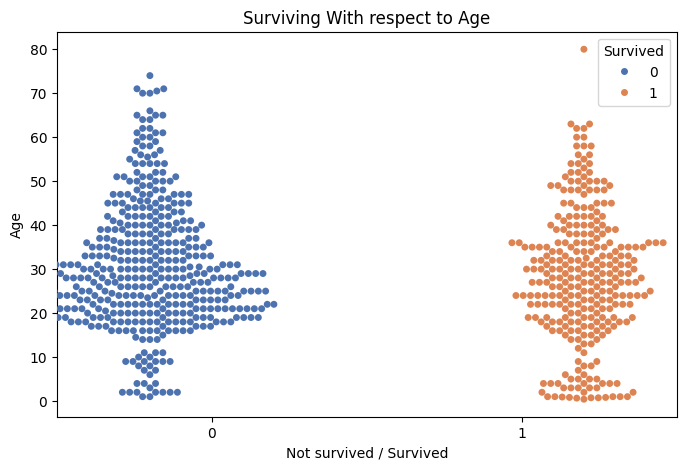

In [ ]:
df_numerical = df[['Age', 'Survived']].copy()

# Handle missing values in 'Age' by filling with the median
df_numerical['Age'] = df_numerical['Age'].fillna(df_numerical['Age'].median())

# Standardize the data (important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8, 5))
sns.swarmplot(x=df['Cluster'], y=df['Age'], hue=df['Survived'], palette="deep", dodge=True)

plt.xlabel("Not survived / Survived")
plt.ylabel("Age")
plt.title("Surviving With respect to Age")
plt.legend(title="Survived")
plt.show()

Apply elbow method to check number of clusters


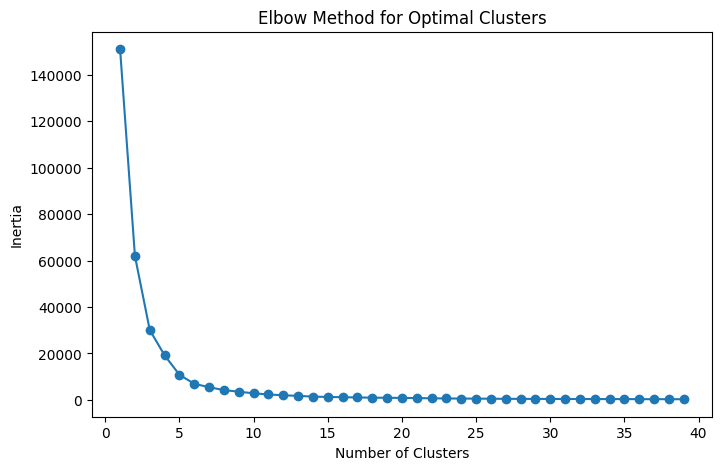

In [ ]:
x = df['Age'].copy()
x = x.fillna(x.median())
y = df['Survived']

# Combine Age and Survived into a tuple for clustering
data = list(zip(x, y))

# Store inertia values for different numbers of clusters
inertias = []
# inertia measures how well the clusters are formed. It is the sum of squared distances between each data point and the centroid of the cluster it belongs to.
# In elbow method we will see that distances b/w points and there centroid will become minimum eventually

for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 40), inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Plotting Clusters

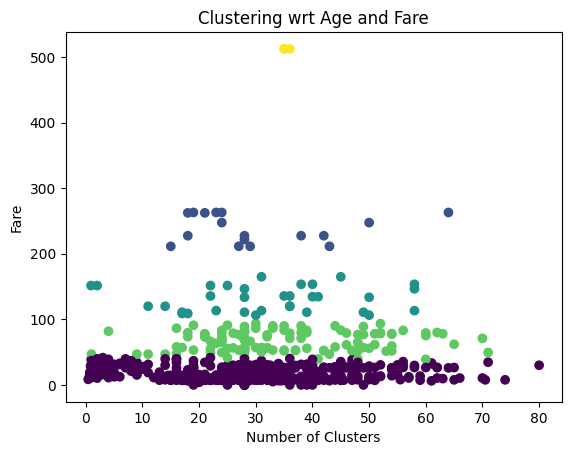

In [29]:
x = df['Age'].copy()
x = x.fillna(x.median())
y = df['Fare']

# Combine Age and Fare into a tuple for clustering
data = list(zip(x, y))

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.title('Clustering wrt Age and Fare')
plt.xlabel('Number of Clusters')
plt.ylabel('Fare')
plt.show()

K-means from scratch using euclidean distance .

Apply k means on any numerical column from the provided data set .For the distance formula use euclidean distance .

final centroids:
 [[ 31.74369034 187.03285849]
 [ 29.56980696  22.41194248]]


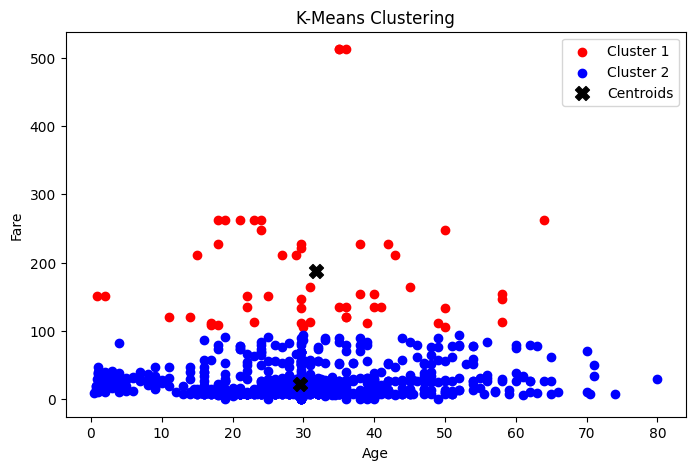

In [ ]:

# K-Means from Scratch using Euclidean Distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))  # a and b will be numpy arrays so formula will execute element wise

def k_means(df, k, max_iters=100):

    df['Age'] = df['Age'].fillna(df['Age'].median())  # fill all the empty cells in Age column with mean of Ages
    data = df[['Age','Fare']].values
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)] # list of k empty lists.

        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids] # finds distances of point from all the centroids (k)
            cluster_idx = np.argmin(distances) # np.argmin() returns the index of the minimum value in the list
            clusters[cluster_idx].append(point)

        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] # if cluster is empty it keeps the previous centroid otherwise calculates new centroid by average of points(x,y) in cluster
                                  for i, cluster in enumerate(clusters)]) # i takes index and cluster takes data point (cluster) as enumerate gives both index and data value

        # axis = 0 ensures col wise mean

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

k = 2
centroids, clusters = k_means(df, k)
print("final centroids:\n",centroids)

plt.figure(figsize=(8, 5))
colors = ['r', 'b']

for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if len(cluster) > 0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')  #  [:,0] -> all x values and [:,1] -> all y values
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("K-Means Clustering")
plt.legend()
plt.show()
